In [2]:
# En primer lugar, se importan las librerías necesarias

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import string
import copy
import os
import pickle

**Buscar una introducción para este caso**

Con el objetivo de estudiar esta red, se procede a responder a una serie de preguntas sobre el grafo. Para poder responder a muchas de estas preguntas, se requiere el uso de las funciones proporcionadas por el módulo ``networkx`` de forma que, antes de nada, se va a proceder a cargar dicha red. Además, para poder simplificar el estudio, siendo ésta una red dirigida, se va a convertir a un grafo simple, usando la función ``nx.Graph()``:

In [36]:
# Carga del grafo
G_DM = nx.read_edgelist("./datos/Rat_protein_interactions_(IntAct).txt")
nx.info(G_DM)

'Name: \nType: Graph\nNumber of nodes: 1375\nNumber of edges: 1618\nAverage degree:   2.3535'

* a. ¿Es ponderado?

El grafo de estudio se lee a partir de un fichero en formato txt, el cual consiste en un una lista de ramas. Es decir, cada línea constituye una rama del grafo, en la que la única información disponible son los nodos de origen y destino de la rama en cuestión. Por tanto, este grafo no es ponderado porque, en caso de que lo fuera, debería especificarse el peso asignado a cada rama particular, cuando no es así.

* b. ¿Cuál es su tamaño y su orden? ¿Es un grafo dirigido o no? ¿Es un grafo denso o disperso?

In [37]:
# Cálculos
n = nx.number_of_nodes(G_DM)
m = nx.number_of_edges(G_DM)
info = nx.info(G_DM)
directionality = nx.is_directed(G_DM)
dens = nx.density(G_DM)

# Respuestas
display(Markdown("""
<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el tipo de grafo y su grado medio:

<pre>{2}</pre>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es ``True``, es dirigido; si es ``False``, no es dirigido. Así, ¿es dirigido
el grafo de estudio? 

``{3}`` (no es dirigido, algo que ya se sabía porque ``nx.info()`` informa de que el tipo del grafo es Graph).

Respecto a si se trata de un grafo denso o disperso, se puede saber usando la función ``nx.density()``, que 
devuelve el coeficiente de densidad, a partir del cual se puede determinar si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En el caso del grafo de estudio, se puede observar cómo el coeficiente de densidad es igual a {4}, por lo que se
trata de un grafo disperso.

<br>""".format(n, m, info, directionality, round(dens, 7))))


<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: 1375
* Tamaño del grafo: 1618

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el tipo de grafo y su grado medio:

<pre>Name: 
Type: Graph
Number of nodes: 1375
Number of edges: 1618
Average degree:   2.3535</pre>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es ``True``, es dirigido; si es ``False``, no es dirigido. Así, ¿es dirigido
el grafo de estudio? 

``False`` (no es dirigido, algo que ya se sabía porque ``nx.info()`` informa de que el tipo del grafo es Graph).

Respecto a si se trata de un grafo denso o disperso, se puede saber usando la función ``nx.density()``, que 
devuelve el coeficiente de densidad, a partir del cual se puede determinar si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En el caso del grafo de estudio, se puede observar cómo el coeficiente de densidad es igual a 0.0017128, por lo que se
trata de un grafo disperso.

<br>

* c. ¿Es conexo? En caso negativo, ¿es fuerte o débilmente conexo?

In [38]:
print("¿Es este grafo conexo?", end = " ")
if nx.is_connected(G_DM) == True:
    print(nx.is_connected(G_DM))
else:
    print(nx.is_connected(G_DM))
    print("¿Cuántas componentes conexas tiene?", nx.number_connected_components(G_DM))
    max_connected = lambda graph: max([graph.subgraph(c) for c in nx.connected_components(graph)], key = len)
    print("¿Cuál es la información de la componente conexa de mayor tamaño?",
          nx.info(max_connected(G_DM)), sep = "\n\n")

¿Es este grafo conexo? False
¿Cuántas componentes conexas tiene? 69
¿Cuál es la información de la componente conexa de mayor tamaño?

Name: 
Type: Graph
Number of nodes: 1169
Number of edges: 1469
Average degree:   2.5133


* d. ¿Tiene lazos?

In [39]:
if nx.number_of_selfloops(G_DM) == 0:
    print("El grafo no tiene lazos.")
else:
    print("El grafo tiene {0} lazos.".format(nx.number_of_selfloops(G_DM)))
    print("Los nodos con lazos son:", [node for node in list(nx.nodes_with_selfloops(G_DM))])

El grafo tiene 23 lazos.
Los nodos con lazos son: ['DCC', 'EBI-2338999', 'NCOA6', 'NR3C1', 'SLK', 'MAP3K1', 'SYT1', 'CAV1', 'EBI-1637976', 'HRMT1L2', 'HAP1', 'SHARPIN', 'GRIP2_V3', 'CD200', 'NPLOC4', 'HSPA5', 'PICK1', 'SNAP25', 'FNTA', 'EBI-493558', 'HRMT1L3', 'PAWR', 'PFKFB1']


* e. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.

In [40]:
try:
    cycles_list = nx.find_cycle(G_DM, orientation = "original")
    print("El grafo tiene {0} ciclos.".format(len(cycles_list)))
    print("Los ciclos que tiene el grafo son:", [cycle for cycle in cycles_list])
    # cycles_list = list(nx.simple_cycles()) # Inviable, ni se te ocurra ejecutarlo que peta
    # print(len(cycles_list))
    # print(cycles_list)
except nx.NetworkXNoCycle:
    print("El grafo  no tiene ciclos")

El grafo tiene 3 ciclos.
Los ciclos que tiene el grafo son: [('SNTA1', 'PTPRN', 'forward'), ('PTPRN', 'CAPON', 'forward'), ('CAPON', 'SNTA1', 'forward')]


* f. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m). Indica si ambos grafos son conexos. Calcula número de componentes conexas de cada grafo. ¿Cuál es el nodo con mayor grado en cada grafo? ¿Cuál es el nodo con mayor betweeness? ¿Cuál es el nodo con mayor closeness? ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)? ¿Cuál es el mayor valor de k para el cual existe un k-core?

In [46]:
G_AL = nx.gnm_random_graph(n, m)

In [42]:
print("¿Es este grafo conexo?", end = " ")
if nx.is_connected(G_AL) == True:
    print(nx.is_connected(G_AL))
else:
    print(nx.is_connected(G_AL))
    print("¿Cuántas componentes conexas tiene?", nx.number_connected_components(G_AL))
    max_connected = lambda graph: max([graph.subgraph(c) for c in nx.connected_components(graph)], key = len)
    print("¿Cuál es la información de la componente conexa de mayor tamaño?",
          nx.info(max_connected(G_AL)), sep = "\n\n")

¿Es este grafo conexo? False
¿Cuántas componentes conexas tiene? 147
¿Cuál es la información de la componente conexa de mayor tamaño?

Name: 
Type: Graph
Number of nodes: 1214
Number of edges: 1603
Average degree:   2.6409


In [43]:
Degree_DM = dict(nx.degree(G_DM))
Degree_AL = dict(nx.degree(G_AL))
Max_degree_node_DM = max(Degree_DM.items(), key = lambda k: k[1])
Max_degree_node_AL = max(Degree_AL.items(), key = lambda k: k[1])

print("El nodo con mayor grado ({0}) del grafo  es {1}.".format(Max_degree_node_DM[1],
                                                                    Max_degree_node_DM[0]))
print("El nodo con mayor grado ({0}) del grafo G_AL es el {1}-ésimo.".format(Max_degree_node_AL[1],
                                                                             Max_degree_node_AL[0]))

El nodo con mayor grado (627) del grafo  es SLC2A4.
El nodo con mayor grado (8) del grafo G_AL es el 602-ésimo.


In [44]:
sorted_degree = sorted(list(Degree_DM.items()), 
                       key = lambda k: k[1], reverse = True)

print(*sorted_degree[:5], sep = "\n")

('SLC2A4', 627)
('EBI-2257702', 112)
('TNF', 89)
('HNRPK', 78)
('EBI-1638146', 47)


In [45]:
betweenness_node_DM = nx.betweenness_centrality(G_DM)
max_betweenness_node_DM = max(betweenness_node_DM.items(), key = lambda k: k[1])
print("El nodo con el mayor betweenness de G_DM y su valor:", max_betweenness_node_DM[0], ";",
      round(max_betweenness_node_DM[1], 4))

betweenness_node_AL = nx.betweenness_centrality(G_AL)
max_betweenness_node_AL = max(betweenness_node_AL.items(), key = lambda k: k[1])
print("El nodo con el mayor betweenness de G_AL y su valor:", max_betweenness_node_AL[0], ";",
      round(max_betweenness_node_AL[1], 4))

El nodo con el mayor betweenness de G_DM y su valor: SLC2A4 ; 0.6062
El nodo con el mayor betweenness de G_AL y su valor: 1242 ; 0.0376


In [12]:
closeness_node_DM = nx.closeness_centrality(G_DM)
max_closeness_node_DM = max(closeness_node_DM.items(), key = lambda k: k[1])
print("El nodo con el mayor closeness de G_DM y su valor:", max_closeness_node_DM[0], ";",
      round(max_closeness_node_DM[1], 4))

closeness_node_AL = nx.closeness_centrality(G_AL)
max_closeness_node_AL = max(closeness_node_AL.items(), key = lambda k: k[1])
print("El nodo con el mayor closeness de G_AL y su valor:", max_closeness_node_AL[0], ";",
      round(max_closeness_node_AL[1], 4))

El nodo con el mayor closeness de G_DM y su valor: CG12470 ; 0.3256
El nodo con el mayor closeness de G_AL y su valor: 2775 ; 0.2281


In [13]:
try:
    print("La máxima distancia entre dos nodos (diámetro) del grafo G_DM es {0}.".format(nx.diameter(G_DM)))
except nx.NetworkXError:
    print("Debido a que el grafo G_DM no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")
    
try:
    print("La máxima distancia entre dos nodos (diámetro) del grafo G_AL es {0}.".format(nx.diameter(G_AL)))
except nx.NetworkXError:
    print("Debido a que el grafo G_AL no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")

Debido a que el grafo G_DM no es conexo, la máxima distancia entre dos nodos del grafo es infinita.
Debido a que el grafo G_AL no es conexo, la máxima distancia entre dos nodos del grafo es infinita.


In [14]:
# Debido a que ambos grafos contienen bucles, la función de búsqueda del máximo k para el cual existe un k-core no
# se puede implementar, de forma que se va a implementar para el grafo resultante de eliminar las ramas que dan
# lugar a dichos bucles.

G_DM_no_loops = copy.deepcopy(G_DM)
G_DM_no_loops.remove_edges_from(nx.selfloop_edges(G_DM_no_loops))
G_AL_no_loops = copy.deepcopy(G_AL)
G_AL_no_loops.remove_edges_from(nx.selfloop_edges(G_AL_no_loops))
Kcore_DM = nx.core_number(G_DM_no_loops)
Kcore_AL = nx.core_number(G_AL_no_loops)
print("El máximo k para el cual existe un k-core en el grafo G_DM sin bucles es:", max(Kcore_DM.values()))
print("El máximo k para el cual existe un k-core en el grafo G_AL sin bucles es:", max(Kcore_AL.values()))

El máximo k para el cual existe un k-core en el grafo G_DM sin bucles es: 11
El máximo k para el cual existe un k-core en el grafo G_AL sin bucles es: 4


* g. Visualizad la distribución del grado de los nodos de ambos grafos. ¿Son iguales las gráficas de distribución de grados de ambos grafos?.

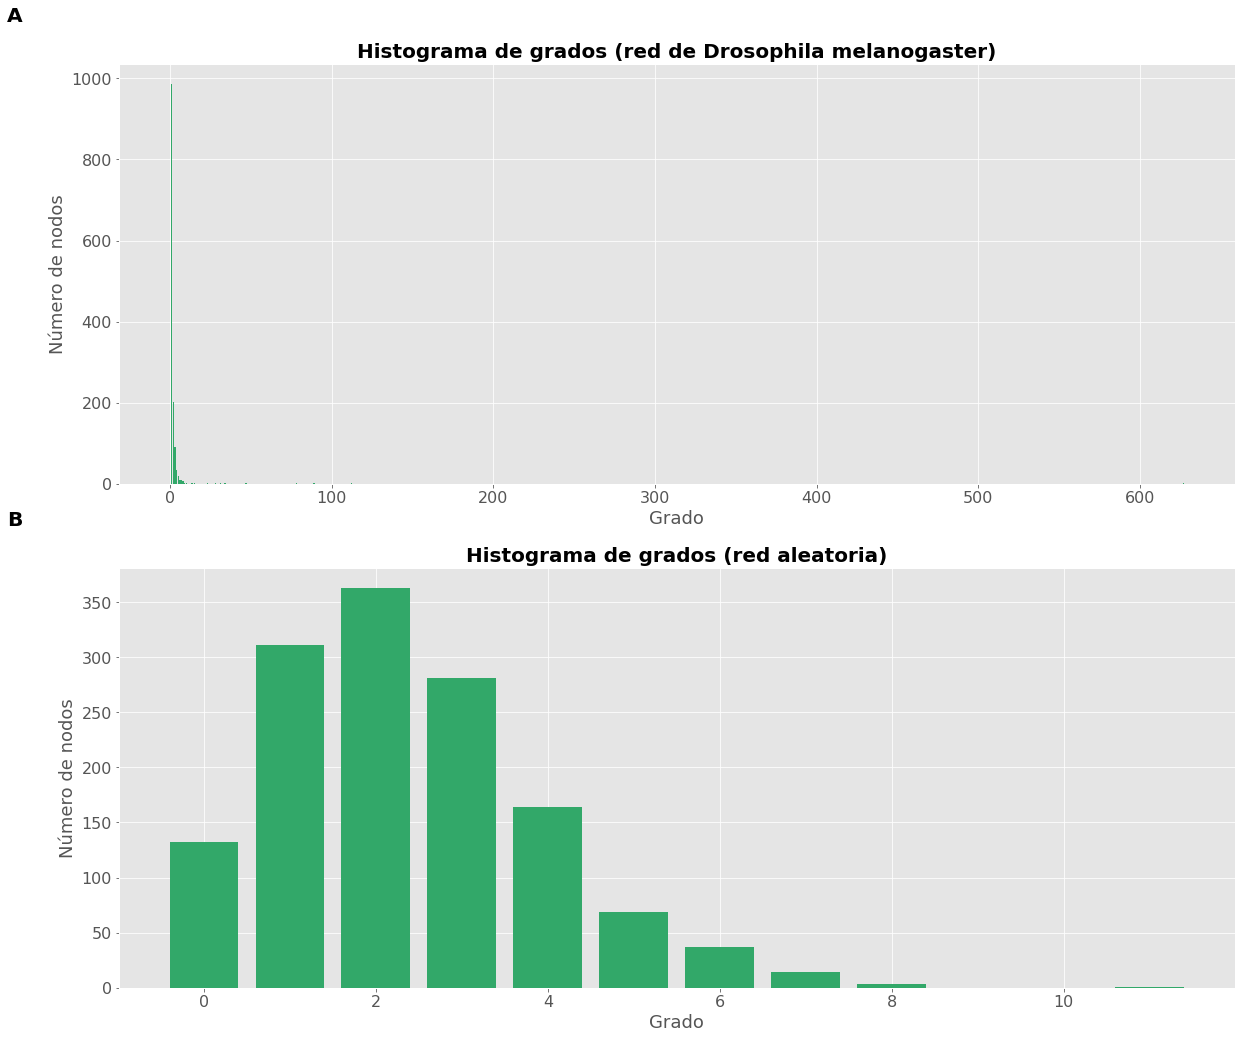

In [47]:
# Cálculo de la distribución de grados de los grafos
L_AL = nx.degree_histogram(G_AL)
L_DM = nx.degree_histogram(G_DM)

# Settings representación
textSize = 20
list_titles = ["Histograma de grados (red de Drosophila melanogaster)", "Histograma de grados (red aleatoria)"]
list_data = [L_DM, L_AL]

# Representación 
fig, axs = plt.subplots(2, 1, figsize = (20, 17))

for nax, ax in enumerate(axs.flat):
    ax.bar(range(len(list_data[nax])), list_data[nax], width = 0.80, color = "#32a869")
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Número de nodos", fontsize = textSize * 0.9)
    ax.set_xlabel("Grado", fontsize = textSize * 0.9)
    ax.tick_params(labelsize = textSize * 0.8)

* f. ¿Qué conclusión sacas de lo anterior? Dibuja ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje: ``plt.xscale("log", nonposx='clip')``, ``plt.yscale("log", nonposy='clip')``. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?

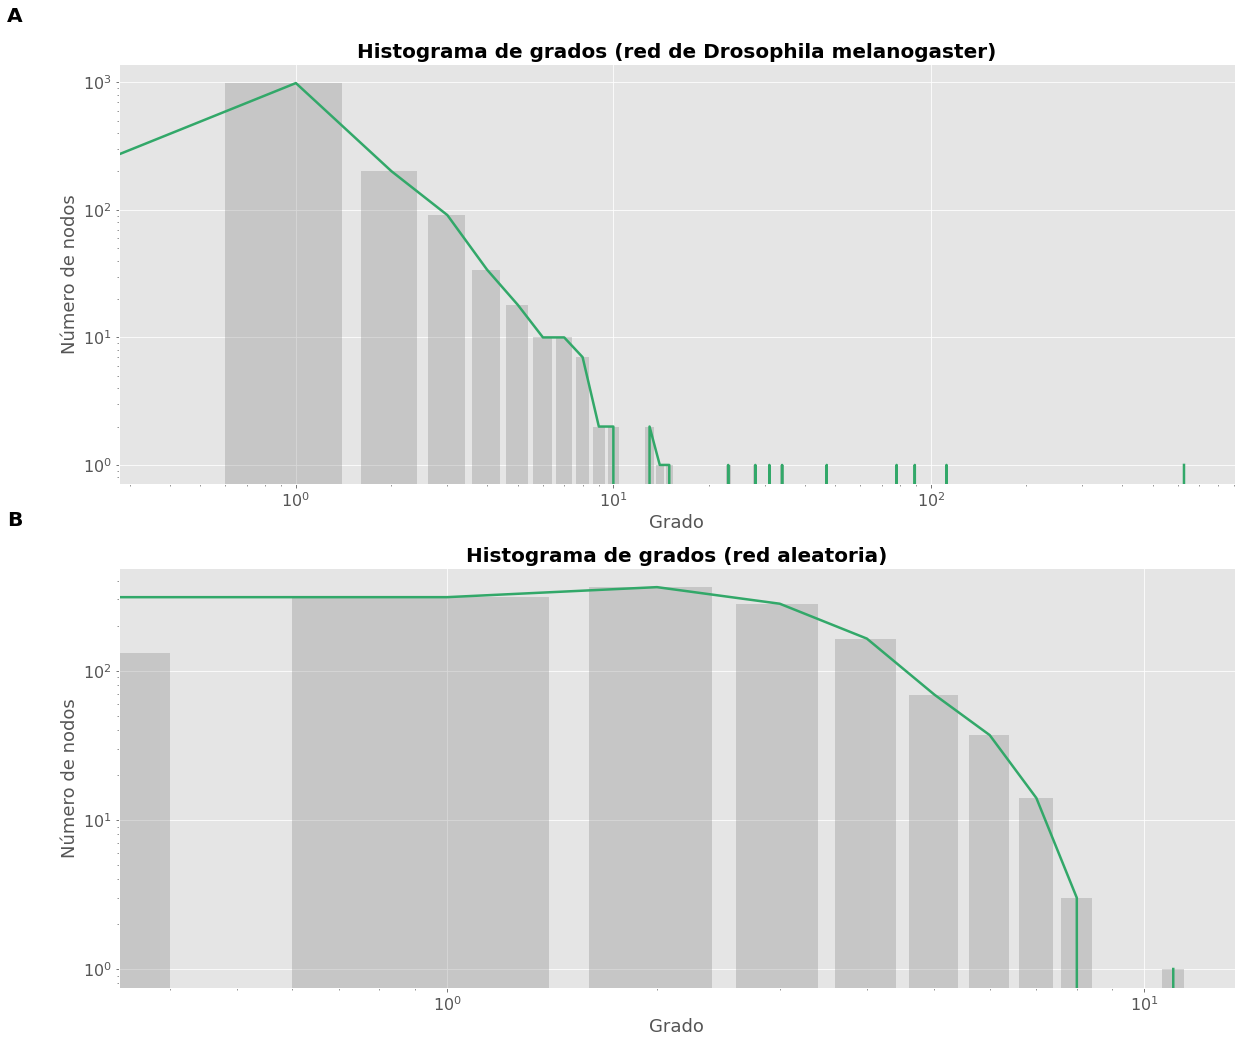

In [48]:
# Representación 
fig, axs = plt.subplots(2, 1, figsize = (20, 17))

for nax, ax in enumerate(axs.flat):
    ax.plot(range(len(list_data[nax])), list_data[nax], color = "#32a869", linewidth = 2.5)
    ax.bar(range(len(list_data[nax])), list_data[nax], alpha = 0.3, color = "grey")
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Número de nodos", fontsize = textSize * 0.9)
    ax.set_xlabel("Grado", fontsize = textSize * 0.9)
    ax.tick_params(labelsize = textSize * 0.8)
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')

* g. ¿Cuál es el valor promedio de los coeficientes C (índice de clusterización) y L (camino característico) de cada uno de los grafos?

In [ ]:
if os.path.isfile("datos/Gs_metrics_DM.pkl"):
    with open("datos/Gs_metrics_DM.pkl", "rb") as file:
        Gs_metrics = pickle.load(file)
else:
    C_DM = nx.average_clustering(G_DM)
    if nx.is_connected(G_DM):
        L_DM = nx.average_shortest_path_length(G_DM)
    else:
        L_DM = nx.average_shortest_path_length(max_connected(G_DM))
    C_AL = nx.average_clustering(G_AL)
    if nx.is_connected(G_AL):
        L_AL = nx.average_shortest_path_length(G_AL)
    else:
        L_AL = nx.average_shortest_path_length(max_connected(G_AL))
    
    Gs_metrics = [C_DM, L_DM, C_AL, L_AL]
    
    with open("datos/Gs_metrics_DM.pkl", "wb") as file:
        pickle.dump(Gs_metrics, file, -1)

In [23]:
print("El índice de clusterización (C) promedio de G_DM es {0}.".format(Gs_metrics[0]))
if nx.is_connected(G_DM):
    print("El camino característico (L) promedio de G_DM es {0}.".format(Gs_metrics[1]))
else:
    print("Dado que el grafo G_DM no es conexo, su camino característico (L) promedio se puede denotar como el",
          "número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho",
          "grafo, cuyos respectivos valores son: {0}; {1}.".format(int(n - 1), round(Gs_metrics[1], 4)))
print()
print("El índice de clusterización (C) promedio de G_AL es {0}.".format(Gs_metrics[2]))
if nx.is_connected(G_AL):
    print("El camino característico (L) promedio de G_AL es {0}.".format(Gs_metrics[3]))
else:
    print("Dado que el grafo G_AL no es conexo, su camino característico (L) promedio se puede denotar como el",
          "número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho",
          "grafo, cuyos respectivos valores son: {0}; {1}.".format(int(n - 1), round(Gs_metrics[3], 4)))

El índice de clusterización (C) promedio de G_DM es 0.021679413109029128.
Dado que el grafo G_DM no es conexo, su camino característico (L) promedio se puede denotar como el número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho grafo, cuyos respectivos valores son: 8079; 4.371.

El índice de clusterización (C) promedio de G_AL es 0.0006154351698906148.
Dado que el grafo G_AL no es conexo, su camino característico (L) promedio se puede denotar como el número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho grafo, cuyos respectivos valores son: 8079; 5.0247.
